In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
pd.set_option('max_columns',400)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
## Load train and test data
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
train_id = train.Id
test_id = test.Id
target = train.SalePrice
train.drop("Id",1,inplace=True)
test.drop("Id",1,inplace=True)
train.drop("SalePrice",1,inplace= True)
data = pd.concat([train,test])
data.MSSubClass = data.MSSubClass.astype("object")
data.MoSold = data.MoSold.astype("object")

In [29]:
# fix the skewness of the data

numeric_types = data.dtypes[data.dtypes != "object"].index
skewd = data[numeric_types].columns[data[numeric_types].skew() > 0.75]
data_log = data[skewd].apply(np.log1p,1)
category = list(set.difference(set(data.columns.values), set(numeric_types)))
data[skewd] = data_log
data[numeric_types] = data[numeric_types].fillna(data[numeric_types].median())

In [30]:
# Ordering Categorical features
data.Street = data.Street.replace(["Grvl","Pave"],[1,2])
data.Alley = data.Alley.replace([np.nan,"Grvl","Pave"],[0,1,2])
data.LotShape = data.LotShape.replace(["IR3","IR2","IR1","Reg"],[1,2,3,4])
data.LandSlope = data.LandSlope.replace(["Sev","Mod","Gtl"],[1,2,3])
data.ExterQual = data.ExterQual.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
data.ExterCond = data.ExterCond.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
data.BsmtQual = data.BsmtQual.replace([np.nan,"Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
data.BsmtCond = data.BsmtCond.replace([np.nan,"Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
data.BsmtExposure = data.BsmtExposure.replace([np.nan,"No","Mn","Av","Gd"],[0,1,2,3,4])
data.BsmtFinType1 = data.BsmtFinType1.replace([np.nan,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],
                                              [0,1,2,3,4,5,6])
data.BsmtFinType2 = data.BsmtFinType2.replace([np.nan,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],
                                              [0,1,2,3,4,5,6])
data.HeatingQC = data.HeatingQC.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
data.CentralAir = data.CentralAir.replace(['N','Y'],[0,1])
data.KitchenQual = data.KitchenQual.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
data.Functional = data.Functional.replace([np.nan,"Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],
                                         [0,1,2,3,4,5,6,7,8])
data.FireplaceQu = data.FireplaceQu.replace([np.nan,"Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
data.GarageFinish = data.GarageFinish.replace([np.nan,"Unf","RFn","Fin"],[0,1,2,3])
data.GarageQual = data.GarageQual.replace([np.nan,"Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
data.GarageCond = data.GarageCond.replace([np.nan,"Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
data.PavedDrive = data.PavedDrive.replace(["N","P","Y"],[0,1,2])
data.PoolQC = data.PoolQC.replace([np.nan,"Fa","TA","Gd","Ex"],[0,1,2,3,4])
data.Fence = data.Fence.replace([np.nan,"MnWw","GdWo","MnPrv","GdPrv"],[0,1,2,3,4])
data.GarageType = data.GarageType.replace(np.nan,"No Garage")
data.MiscFeature = data.MiscFeature.replace(np.nan,"No Feature")

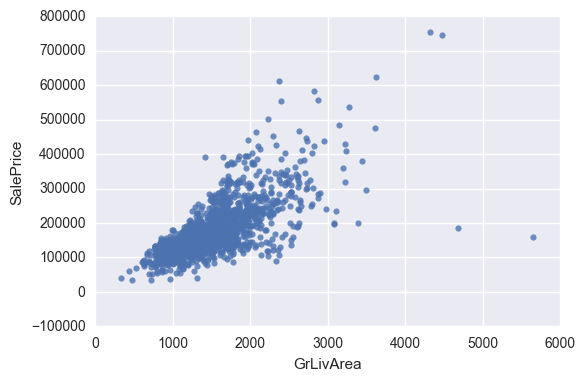

In [31]:
## Detection of the outliers in the data

sns.regplot(train.GrLivArea.dropna(),target[train.GrLivArea.dropna().index],
            fit_reg=False,scatter=True)


In [32]:
## Remove observation above the 4000 squarefeet
row_name = train.GrLivArea[train.GrLivArea > 4000].index
print(row_name)

Int64Index([523, 691, 1182, 1298], dtype='int64')


In [33]:
## Get dummies of the categorical data
dummy = pd.get_dummies(data)
print(dummy.shape)
dummy.reset_index(inplace=True)
dummy.drop("index",1,inplace=True)

(2919, 248)


In [34]:
train_dummy = dummy.iloc[0:len(train)]
test_dummy = dummy.iloc[len(train):]

print(train.shape)
print(test.shape)
print(train_dummy.shape)
print(test_dummy.shape)

(1460, 79)
(1459, 79)
(1460, 248)
(1459, 248)


In [35]:
train_dummy.drop(train_dummy.index[row_name],inplace=True)
target.drop(target.index[row_name],inplace=True)
test_dummy.fillna(0,inplace=True)

In [36]:
pickle.dump(target,open("../pickles/target.p","wb"))

In [37]:
print(train_dummy.shape)
print(target.shape)

(1456, 248)
(1456,)


In [38]:
## Knn Imputation that we used during our analysis

# from sklearn.neighbors import KNeighborsRegressor
# knn  = KNeighborsRegressor(n_neighbors=5)
# knn = knn.fit(train_dummy,target)

# def knn_impute(model,row_index,target,train):
#     print(target[row_index])
#     target[row_index] = knn.predict(train.iloc[row_index])
#     return target

# test = knn_impute(knn,row_name,target,train_dummy)

In [39]:
pickle.dump(train_dummy,open("../pickles/train_data.p","wb"))
pickle.dump(test_dummy,open("../pickles/test_data.p","wb"))
train_dummy.to_csv("../results/train_dummy.csv",index = False)
test_dummy.to_csv("../results/test_dummy.csv",index = False)
